In [144]:
import numpy as np
import pandas as pd
import cv2
import re
import nltk
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.corpus import wordnet
from matplotlib import pyplot as plt
from usaddress import parse
import string
import torch
from deskew import determine_skew
from sklearn.cluster import DBSCAN
import requests
from bs4 import BeautifulSoup

In [278]:
from read_business_card import *
from database_connection import DBManager
from parse_text import ParseText
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/aaronkline/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/aaronkline/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /Users/aaronkline/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/aaronkline/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

- To do.
    - Identify name
    - Identify the website if there is one
    - Look up the business and get information on it
    - Add all information to the database
    - clean up code and put it all in a repo.

In [102]:
# Read the images in
image_path1 = 'pictures/business_card.jpg'
og_img1 = load_image(image_path1)
prepped1 = preprocess_image(og_img1)

# Read the images in
image_path2 = 'pictures/business_card2.jpg'
og_img2 = load_image(image_path2)
prepped2 = preprocess_image(og_img2)

# Read the images in
image_path3 = 'pictures/IMG_6549.jpg'
og_img3 = load_image(image_path3)
prepped3 = preprocess_image(og_img3)

# Read the images in
image_path4 = 'pictures/IMG_6552.jpg'
og_img4 = load_image(image_path4)
prepped4 = preprocess_image(og_img4)

# Extract Text and find info
# test, _ = extract_all_text(prepped, confidence=50)
# print(test)
# ParseText(test).extract_info()

124 2324 115 1312
0 2128 36 1292
432 3024 1614 3005
1228 2495 1258 3675


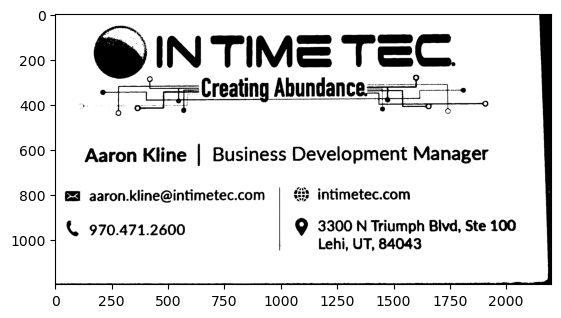

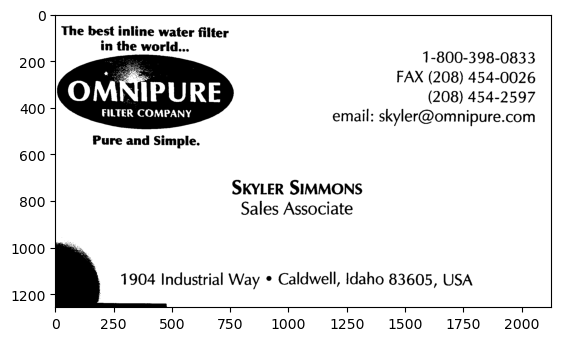

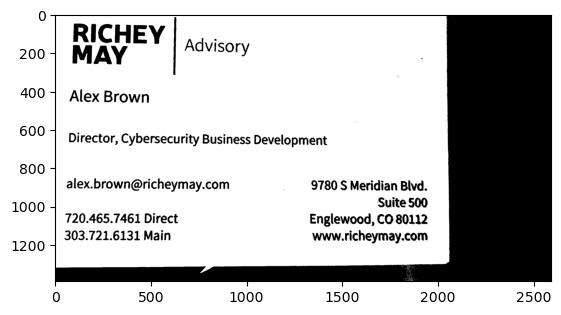

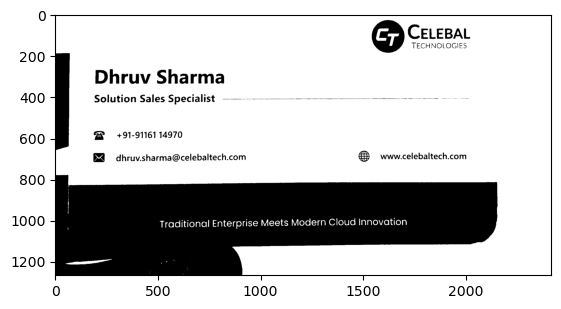

In [105]:
show(prepped1)
show(prepped2)
show(prepped3)
show(prepped4)

In [287]:
text1, df1 = extract_all_text(prepped1)
parsed1 = ParseText(text1)
print(parsed1.extract_info())
db_cont1, db_comp1 = parsed1.get_db_info()

text2, df2 = extract_all_text(prepped2)
parsed2 = ParseText(text2)
print(parsed2.extract_info())
db_cont2, db_comp2 = parsed2.get_db_info()

text3, df3 = extract_all_text(prepped3)
parsed3 = ParseText(text3)
print(parsed3.extract_info())
db_cont3, db_comp3 = parsed3.get_db_info()

text4, df4 = extract_all_text(prepped4)
parsed4 = ParseText(text4)
print(parsed4.extract_info())
db_cont4, db_comp4 = parsed4.get_db_info()

{'email': ['aaron.kline@intimetec.com'], 'website': ['intimetec.com'], 'phone': '970.471.2600', 'name': ['Aaron', 'Kline'], 'fax': None, 'business': 'Intimetec', 'address': '3300 N Triumph Blvd, Ste 100', 'zipcode': '84043', 'city': 'Lehi', 'state': 'UT', 'state_og': 'UT', 'country': ''}
{'email': ['skyler@omnipure.com'], 'website': None, 'phone': '800-398-0833', 'name': ['Skyler'], 'fax': '208) 454-0026', 'business': 'Omnipure', 'address': '1904 Industrial Way', 'zipcode': '83605', 'city': 'Caldwell', 'state': 'ID', 'state_og': 'Idaho', 'country': 'USA'}
{'email': ['alex.brown@richeymay.com'], 'website': ['www.richeymay.com'], 'phone': '720.465.7461', 'name': ['Alex', 'Brown'], 'fax': None, 'business': 'Richeymay', 'address': '9780 S Meridian Blvd. Suite 500', 'zipcode': '80112', 'city': 'Englewood', 'state': 'CO', 'state_og': 'CO', 'country': ''}
{'email': ['dhruv.sharma@celebaltech.com'], 'website': ['www-elebaltech.com'], 'phone': '+91-91161', 'name': ['Dhruv', 'Sharma'], 'fax': No

In [294]:
# connect to db
db_conn = DBManager()

Enter the sql3743596 db password:  ········


Connection made


In [277]:
db_conn.close_connection()

Connection closed


Index(['ContactID', 'EmployerID', 'FirstName', 'LastName', 'Street', 'City',
       'State', 'ZipCode', 'Phone', 'Email'],
      dtype='object')

[110, ['Dhruv', 'Sharma'], '', '', '', '', '+91-91161', 'dhruv.sharma@celebaltech.com']


0

In [127]:
import nltk
from nltk.tag.stanford import StanfordNERTagger

text = """
RRGEY Advisory Alex Brown Director, Cybersecurity Business Development alex.brown@richeymay.com 9780 S Meridian Blvd. Suite 500 720.465.7461 Direct Englewood, CO 80112 www.richeymay.com 303.721.6131 Main
"""

st = StanfordNERTagger('stanford_ner/english.all.3class.distsim.crf.ser.gz',
                       'stanford_ner/stanford-ner.jar')

for sent in nltk.sent_tokenize(text):
    tokens = nltk.tokenize.word_tokenize(sent)
    tags = st.tag(tokens)
    print(tags)
    for tag in tags:
        if tag[1] in ["PERSON", "LOCATION", "ORGANIZATION"]:
            print(tag)

[('RRGEY', 'O'), ('Advisory', 'O'), ('Alex', 'PERSON'), ('Brown', 'PERSON'), ('Director', 'PERSON'), (',', 'O'), ('Cybersecurity', 'O'), ('Business', 'O'), ('Development', 'O'), ('alex.brown', 'O'), ('@', 'O'), ('richeymay.com', 'O'), ('9780', 'O'), ('S', 'O'), ('Meridian', 'O'), ('Blvd', 'O'), ('.', 'O')]
('Alex', 'PERSON')
('Brown', 'PERSON')
('Director', 'PERSON')
[('Suite', 'O'), ('500', 'O'), ('720.465.7461', 'O'), ('Direct', 'O'), ('Englewood', 'LOCATION'), (',', 'O'), ('CO', 'O'), ('80112', 'O'), ('www.richeymay.com', 'O'), ('303.721.6131', 'O'), ('Main', 'O')]
('Englewood', 'LOCATION')


In [42]:
# convert the image to grayscale, blur it, and apply edge detection
# to reveal the outline of the business card
image_path = 'aaron_kline2.jpg'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 30, 150)
# detect contours in the edge map, sort them by size (in descending
# order), and grab the largest contours
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
# Find the contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# Display the image
cv2.imshow('Contours', image)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]
# initialize a contour that corresponds to the business card outline
cardCnt = None

NameError: name 'imutils' is not defined

In [189]:
text = requests.get("https://www.richeymay.com")

In [190]:
pattern = re.compile(r"Copyright")
parse = text.content.decode("utf-8")
location = pattern.search(parse).span()
print(location)
print(parse[slice(*location)])

AttributeError: 'NoneType' object has no attribute 'span'

In [191]:
parse

'<html>\r\n<head><title>403 Forbidden</title></head>\r\n<body>\r\n<center><h1>403 Forbidden</h1></center>\r\n<hr><center>nginx</center>\r\n</body>\r\n</html>\r\n'

### OpenCV Contour Test

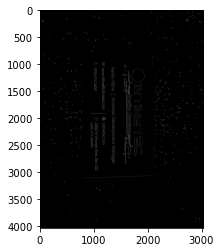

In [48]:
image_path = 'aaron_kline2.jpg'
image = cv2.imread(image_path)
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 30, 150)

# Apply thresholding to create a binary image
_, thresh = cv2.threshold(edged.copy(), 120, 255, cv2.THRESH_BINARY)

# Find the contours
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# Display the image
plt.imshow(edged, cmap='gray')


### MySQL Connection Test

In [57]:
import mysql.connector

mydb = mysql.connector.connect(
  host="sql3.freesqldatabase.com",
  user="sql3743596",
  password="",
  database="sql3743596"
)

mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM Companies")
companies = mycursor.fetchall()
comp_table = pd.DataFrame(myresult, columns=mycursor.column_names)

mycursor.execute("SELECT * FROM Contacts")
contacts = mycursor.fetchall()
cont_table = pd.DataFrame(contacts, columns=mycursor.column_names)

mydb.close()

In [58]:
cont_table

,ContactID,EmployerID,FirstName,LastName,Street,City,State,ZipCode,Phone,Email
0,1,1,John,Smith,45 Beacon Street,Boston,MA,02108,617-555-1111,john.smith@techpro.com
1,2,1,Sarah,Johnson,67 Commonwealth Ave,Boston,MA,02116,None,sarah.j@techpro.com
2,3,2,Michael,Brown,89 Benefit Street,Providence,RI,02903,401-555-2222,None
3,4,3,Emily,Davis,123 Asylum Street,Hartford,CT,06103,860-555-3333,emily.d@techpro.com
4,5,4,David,Wilson,234 Canal Street,New York,NY,10013,212-555-4444,david.w@globalserve.com
...,...,...,...,...,...,...,...,...,...,...
118,119,106,Jeffrey,Wallace,789 Madison Ave,Albany,NY,12207,518-555-3519,jeffrey.w@dataforce.com
119,120,107,Shirley,Morris,None,None,None,None,518-555-3520,shirley.m@dataforce.com
120,121,108,Dennis,Mitchell,234 Smith St,Providence,RI,02903,401-555-3521,dennis.m@cybersol.com
121,122,108,Ruth,Rogers,567 Angel St,Providence,RI,02903,None,ruth.r@cybersol.com


In [ ]:
"rwP5Nr2azB"

In [77]:
db = DBManager()

sql3743596 sql3743596 sql3.freesqldatabase.com


Enter the sql3743596 db password:  ········


sql3743596 sql3743596 rwP5Nr2azB sql3.freesqldatabase.com


In [257]:
comp_table = db_conn.select_data_pandas("SELECT * FROM Companies")

comp_table

,CompanyID,CompanyName,Street,City,State,ZipCode,Phone,Fax
0,0,Celebaltech,,,,,+91-91161,None
1,1,TechPro,123 Innovation Drive,Boston,MA,02108,617-555-0101,617-555-0102
2,2,TechPro,789 Enterprise Way,Providence,RI,02903,401-555-0201,None
3,3,TechPro,456 Technology Park,Hartford,CT,06103,860-555-0301,860-555-0302
4,4,GlobalServe,567 Commerce Street,New York,NY,10013,212-555-0401,212-555-0402
...,...,...,...,...,...,...,...,...
105,105,Tech Systems Corp,147 Development Drive,West Hartford,CT,06117,None,None
106,106,DataForce Solutions,369 Analytics Lane,Albany,NY,12207,518-555-0501,518-555-0502
107,107,DataForce Solutions,258 Mining Way,Saratoga Springs,NY,12866,518-555-0601,None
108,108,Cyber Solutions Corp,147 Security Road,Providence,RI,02903,401-555-0701,401-555-0702


### EasyOCR Test

In [1]:
import easyocr

reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

(np.float64(-0.5), np.float64(2323.5), np.float64(1311.5), np.float64(-0.5))

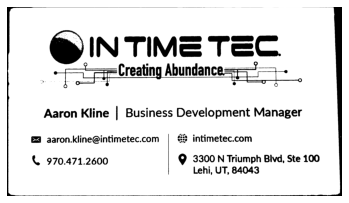

In [68]:
image = cv2.imread("pictures/business_card.jpg")
# rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(thresh2, cmap="gray")
plt.axis('off')

In [40]:
text = reader.readtext(rgb)
for i in text:
    print(i[1], end=" ")

NameError: name 'reader' is not defined

### Pytesseract Test

In [8]:
data = pytesseract.image_to_data(image)
data_split = [i.split("\t") for i in data.strip().split("\n")]
df = pd.DataFrame(data_split[1:], columns = data_split[0])
for column in df.columns[:-2]:
    df[column] = df[column].astype("int32")
df["conf"] = df["conf"].astype("float64")
text = " ".join(list(df[df.conf > 70].dropna().text))
text

'TEC Aaron Kline | Business Development Manager aaron.kline@intimetec.com intimetec.com 970.471.2600 Q 3300 N Triumph Ste 100 Lehi, UT, 84043  '

In [8]:
from transformers import pipeline, AutoTokenizer, AutoModelForTokenClassification
model_checkpoint = "xlm-roberta-large-finetuned-conll03-english"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [9]:
model = AutoModelForTokenClassification.from_pretrained(model_checkpoint,local_files_only=True)
# classifier = pipeline("ner", model=model, tokenizer=tokenizer)

# classifier = pipeline("token-classification",model=model.to("cpu"), binary_output=True, tokenizer= tokenizer, aggregation_strategy = "simple")

AttributeError: 'NoneType' object has no attribute 'endswith'

In [ ]:
extracted_text = "The best inline water filter in the world... 1-800-398-0833 FAX (208) 454-0026 (208) 454-2597 HILTER COMPANY email: skylere@omnipure.com Pure and Simple. OMNIPURE   SKYLER SIMMONS Sales Associate      1904 Industrial Way * Caldwell, Idaho 83605, USA"

def name(extracted_text):
    token = classifier(extracted_text)
    v = [t for t in token if t["entity_group"] == "PER"]
    if len(v) > 0:
        r = max(v, key=lambda z: z['score'])
        name = r['word']
    else:
        return ""
    print("Name:")
    print(name.strip())
    return name.strip()

pname = name(extracted_text)